<a href="https://colab.research.google.com/github/RamiAmasha31/CloudCourse/blob/main/MyFirstColabNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import time
print(time.ctime())


Sun Jan 21 20:19:37 2024


In [45]:
time.sleep(5)
print (time.ctime())


Sun Jan 21 20:19:42 2024


In [46]:
print("Hello, world!")


Hello, world!


In [47]:
!pip install numpy


In [48]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


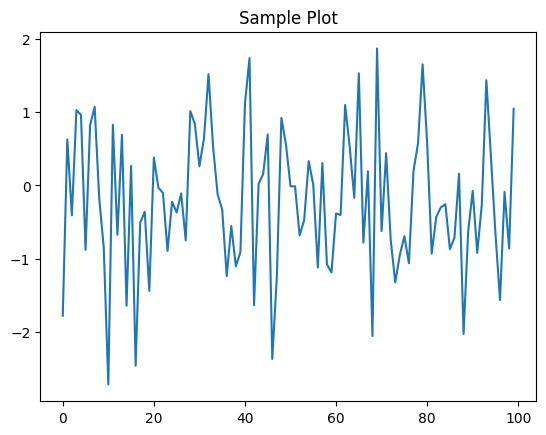

In [49]:
import numpy as np
from matplotlib import pyplot as plt

y = np.random.randn(100)
x = [x for x in range(len(y))]

plt.plot(x, y, '-')
plt.fill_between(x, y, 200, where = (y > 195), facecolor='g', alpha=0.6)

plt.title("Sample Plot")
plt.show( )


In [50]:
# @title rami
sleeptime = 2 # @param {type:"integer"}


In [51]:
import time
print(time.ctime())
time.sleep(sleeptime)
print (time.ctime())


Sun Jan 21 20:19:51 2024
Sun Jan 21 20:19:53 2024


In [52]:
name ='ramiamasha' #@param {type:"string"}
print(name)


ramiamasha


In [53]:
color = 'green' #@param ["red", "green", "blue"]
print(color)


green


In [54]:
#@title Date fields
date_input = '2019-06-03' #@param {type:"date"}
print(date_input)


2019-06-03


In [55]:
#@title Default title text
%%html
<style>
body{
  background-color: #f2bcca;
}
</style>
color = 'green' #@param ["red", "green", "blue"] print(color)
<svg xmlns="https://www.w3.org/2000/svg" viewBox="0 0 600 400" width="400" height="400">
   <rect x="10" y="00" width="300" height="100" rx="0" style="fill:orange; stroke:black; fill-opacity:1.0" />
   <rect x="10" y="100" width="300" height="100" rx="0" style="fill:white; stroke:black; fill-opacity:1.0;" />
   <rect x="10" y="200" width="300" height="100" rx="0" style="fill:green; stroke:black; fill-opacity:1.0;" />
</svg>


In [59]:

cd /content/drive/MyDrive

/content/drive/MyDrive


In [70]:
# Specify the content you want in the file
file_content = "One Two Three"

# Specify the file path in Google Drive
file_path = '/content/drive/MyDrive/1.txt'
words = file_content.split()
# Write content to the file
with open(file_path, 'w') as file:
    for word in words:
        file.write(word + '\n')

In [66]:

with open('1.txt', 'r') as file:
    contents = file.read()
    print(contents)


One/n Two/n Three


In [71]:
file.close()


In [72]:
with open('example.txt', 'w') as file:
    file.write('This is some example text.')


In [73]:
file.close()


In [74]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    with open('/content/drive/My Drive/1.txt', 'r') as file:
      contents = file.read()
      print(contents)

button.on_click(on_button_clicked)
display(button, output)


Button(description='Click Me!', style=ButtonStyle())

Output()

In [75]:
import ipywidgets as widgets
slider = widgets.IntSlider(value=5, max=10)
display(slider)


IntSlider(value=5, max=10)

In [ ]:
#### from here starts the exrcise of the tutorial

In [79]:
with open('students.txt', 'w') as file:
    file.write('This is some example text.')
file.close()

In [142]:
from google.colab import drive
from ipywidgets import widgets, Output
from IPython.display import display, clear_output

drive.mount('/content/drive')

students_file_path = '/content/drive/MyDrive/students.txt'

with open(students_file_path, 'r') as file:
    lines = file.readlines()

first_names = []
last_names = []
emails = []
courses_list = []
urls = []
favorite_program_input_values=[''] * len(lines)
# process each line in the file and extract information
for line in lines:
    student_info = line.strip().split(',')

    if len(student_info) >= 2:
        first_names.append(student_info[0].strip())
        last_names.append(student_info[1].strip())
        emails.append(student_info[2].strip())
        courses_list.append([course.strip() for course in student_info[3].split(';')])
        urls.append(student_info[4].strip())

dropdown = widgets.Dropdown(options=first_names, description='Select:')
output = Output()

favorite_program_input = widgets.Text(value='', description='Favorite Program:')

update_button = widgets.Button(description='Update Information')

# function to handle dropdown value changes
def on_dropdown_change(change):
    with output:
        clear_output(wait=True)  # Clear previous output
        selected_option = change['new']
        idx = first_names.index(selected_option)
        print(f'Selected Option: {selected_option}')
        print(f'Last Name: {last_names[idx]}')
        print(f'Email: {emails[idx]}')
        print(f'Courses: {courses_list[idx]}')
        print(f'Urls: {urls[idx]}')


def update_information(button):
    with output:
        clear_output(wait=True)  # Clear previous output
        selected_option = dropdown.value
        idx = first_names.index(selected_option)
        favorite_program = favorite_program_input.value

        favorite_program_input_values[idx] = favorite_program
        str= f"{first_names[idx]}, {last_names[idx]}, {emails[idx]}, {';'.join(courses_list[idx])}, {urls[idx]}, {favorite_program_input_values[idx]}\n"
    with open(students_file_path, 'a') as file:
          file.write(str)
    file.close()

# Attach the function to the button click event
update_button.on_click(update_information)

# Observe the value changes in the dropdown
dropdown.observe(on_dropdown_change, names='value')

# Display the widgets
display(dropdown, favorite_program_input, update_button, output)

# Initially trigger the on_dropdown_change function with the first student's name
on_dropdown_change({'new': first_names[0]})


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dropdown(description='Select:', options=('Rami', 'Alice', 'Bob', 'Charlie'), value='Rami')

Text(value='', description='Favorite Program:')

Button(description='Update Information', style=ButtonStyle())

Output()